<a href="https://colab.research.google.com/github/FatoniRahmat/Data-penjualan-supermarket/blob/main/Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Read Data

In [ ]:
#Read data
sheet_url = 'https://docs.google.com/spreadsheets/d/17rYlro20vaBo6P2pOD6stwV5_QTztXqnfxaAzTwOUxU/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
df.info()
#column Seris haves 139 from 175 data, has 36 data null
#column Release have type data is objek (string) must changed to datetime
#must check data duplikat, typo and outlayer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


#2. Data Cleaning

##Drop Duplicates

In [ ]:
df=df.drop_duplicates()
df.info()
#no data duplicate 175 from 175 data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.9+ KB


##Data Null

In [ ]:
df.isna().sum()
#have 36 data null

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

##Change Datatype Datetime

In [ ]:
df['Release']=pd.to_datetime(df['Release'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [ ]:
df['Release'].head()

0   2017-12-01
1   2011-11-01
2   2012-05-01
3   2006-11-01
4   2011-05-01
Name: Release, dtype: datetime64[ns]

In [ ]:
#export data to csv
df.to_csv('Games Sales Cleaned.csv')


#3. EDA

##Newest and Oldest Games

In [ ]:
df[['Name', 'Release']].sort_values('Release', ascending=False)

,Name,Release
20,Valheim,2021-02-01
27,Cyberpunk 2077,2020-12-01
110,Crusader Kings III,2020-09-01
10,Fall Guys,2020-08-01
139,Mordhau,2019-04-01
...,...,...
22,Last Ninja 2,1988-08-01
162,Tetris,1988-01-01
88,International Karate,1985-11-01
34,Where in the World Is Carmen Sandiego?,1985-06-01


##Which publisher published most of the game

In [ ]:
agg_publisher = df.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending=False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


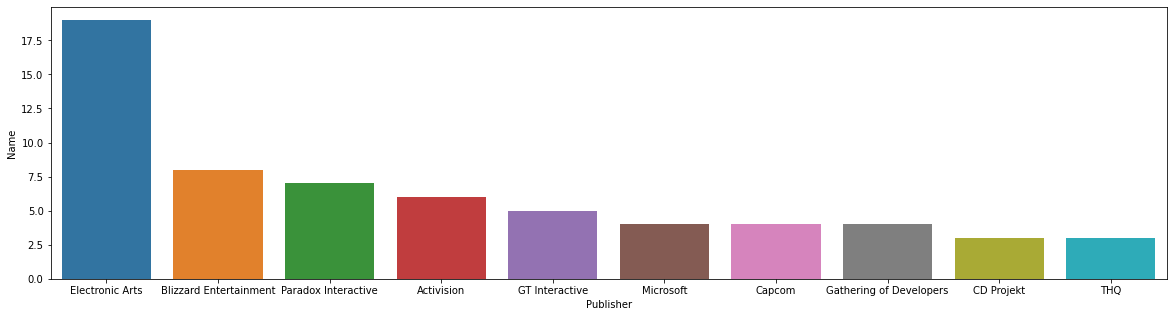

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot('Publisher', 'Name', data=agg_publisher.sort_values('Name', ascending=False).head(10))

##Developer develped most of the game

In [ ]:
agg_dev = df.groupby('Developer', as_index=False)['Name'].nunique()
agg_dev.sort_values('Name', ascending=False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


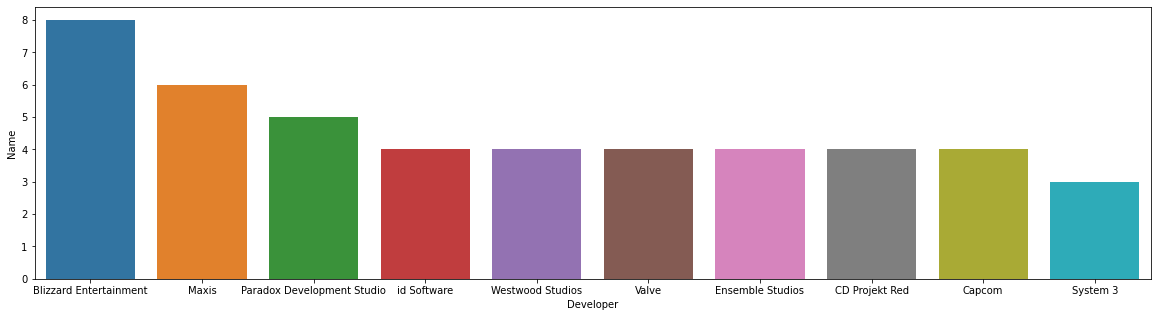

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot('Developer', 'Name', data=agg_dev.sort_values('Name', ascending=False).head(10))

##The most sales from series

In [ ]:
agg_series = df.groupby('Series', as_index=False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
agg_series.sort_values('Sales', ascending=False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


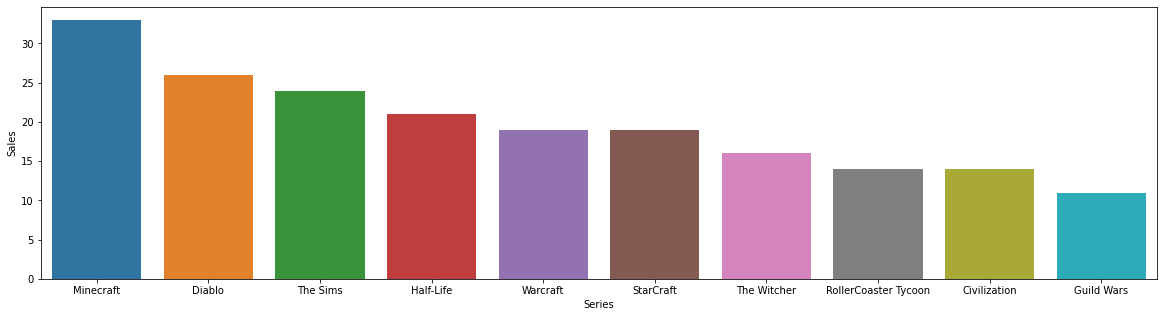

In [ ]:
sns.barplot('Series', 'Sales', data=agg_series.sort_values('Sales', ascending=False).head(10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


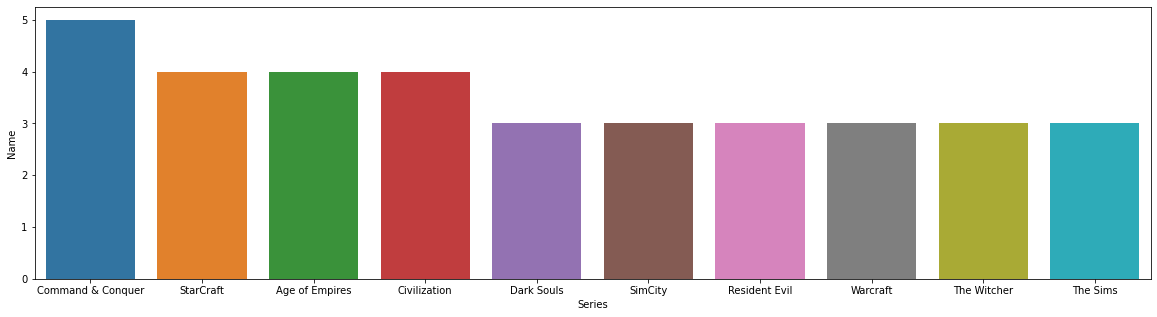

In [ ]:
sns.barplot('Series', 'Name', data=agg_series.sort_values('Name', ascending=False).head(10))